In [ ]:
from sklearn.datasets import fetch_20newsgroups
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import names
from nltk.stem import WordNetLemmatizer
from sklearn.cluster import KMeans
from sklearn.decomposition import NMF

import nltk
nltk.download('names')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package names to /root/nltk_data...
[nltk_data]   Package names is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
groups = fetch_20newsgroups()

In [ ]:
groups.keys()

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

In [ ]:
np.unique(groups.target)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

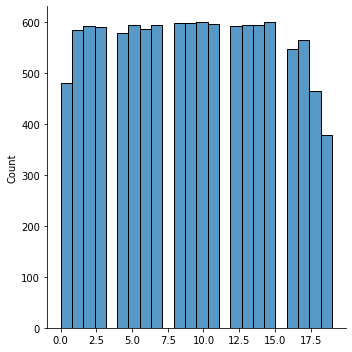

In [ ]:
sns.displot(groups.target)
plt.show()

# Top 500 words in the news

In [ ]:
cv = CountVectorizer(stop_words="english",max_features=500)
transformed = cv.fit_transform(groups.data)
print(cv.get_feature_names_out())

['00' '000' '0d' '0t' '10' '100' '11' '12' '13' '14' '145' '15' '16' '17'
 '18' '19' '1993' '1d9' '20' '21' '22' '23' '24' '25' '26' '27' '28' '29'
 '30' '31' '32' '33' '34' '34u' '35' '40' '45' '50' '55' '80' '92' '93'
 '__' '___' 'a86' 'able' 'ac' 'access' 'actually' 'address' 'ago' 'agree'
 'al' 'american' 'andrew' 'answer' 'anybody' 'apple' 'application' 'apr'
 'april' 'area' 'argument' 'armenian' 'armenians' 'article' 'ask' 'asked'
 'att' 'au' 'available' 'away' 'ax' 'b8f' 'bad' 'based' 'believe'
 'berkeley' 'best' 'better' 'bible' 'big' 'bike' 'bit' 'black' 'board'
 'body' 'book' 'box' 'buy' 'ca' 'california' 'called' 'came' 'canada'
 'car' 'card' 'care' 'case' 'cause' 'cc' 'center' 'certain' 'certainly'
 'change' 'check' 'children' 'chip' 'christ' 'christian' 'christians'
 'church' 'city' 'claim' 'clinton' 'clipper' 'cmu' 'code' 'college'
 'color' 'colorado' 'columbia' 'com' 'come' 'comes' 'company' 'computer'
 'consider' 'contact' 'control' 'copy' 'correct' 'cost' 'country' 'co

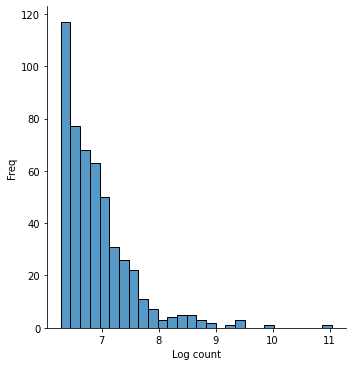

In [ ]:
sns.displot(np.log(transformed.toarray().sum(axis=0)))
plt.xlabel('Log count')
plt.ylabel('Freq')
plt.show()

# Preprocessing the top 500 words using stemming and lemmetizing

In [ ]:
def letter_only(astr):
    return astr.isalpha()

In [ ]:
cv = CountVectorizer(stop_words="english",max_features=500)
cleaned = []
all_names = set(names.words())
lemmatizer = WordNetLemmatizer()

In [ ]:
for post in groups.data:
    cleaned.append(" ".join([lemmatizer.lemmatize(word) for word in post.split() if letter_only(word) and word not in all_names]))

In [ ]:
transformed = cv.fit_transform(cleaned)
print(cv.get_feature_names_out())

['able' 'accept' 'access' 'according' 'act' 'action' 'actually' 'add'
 'address' 'ago' 'agree' 'algorithm' 'allow' 'american' 'anonymous'
 'answer' 'anybody' 'apple' 'application' 'apr' 'area' 'argument'
 'armenian' 'armenians' 'article' 'ask' 'asked' 'assume' 'attack'
 'attempt' 'available' 'away' 'bad' 'based' 'basic' 'belief' 'believe'
 'best' 'better' 'bible' 'big' 'bike' 'bit' 'black' 'board' 'body' 'book'
 'box' 'build' 'bus' 'business' 'buy' 'ca' 'california' 'called' 'came'
 'car' 'card' 'care' 'carry' 'case' 'cause' 'center' 'certain' 'certainly'
 'chance' 'change' 'check' 'child' 'chip' 'christians' 'church' 'city'
 'claim' 'clear' 'clipper' 'code' 'college' 'color' 'come' 'coming'
 'command' 'comment' 'common' 'communication' 'company' 'computer'
 'computing' 'consider' 'considered' 'contact' 'control' 'copy' 'correct'
 'cost' 'country' 'couple' 'course' 'court' 'cover' 'create' 'crime'
 'current' 'cut' 'data' 'day' 'db' 'deal' 'death' 'department' 'device'
 'did' 'differenc

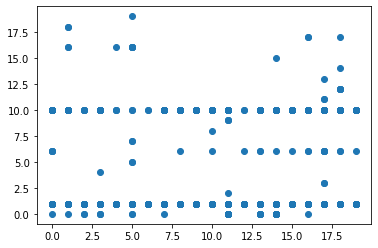

In [ ]:
 km = KMeans(n_clusters=20)
 km.fit(transformed)
 labels = groups.target
 plt.scatter(labels,km.labels_)
 plt.show()

In [ ]:
transformed = cv.fit_transform(cleaned)
nmf = NMF(n_components=100, random_state=43).fit(transformed)

for topic_idx, topic in enumerate(nmf.components_):
    label = '{}: '.format(topic_idx)
    print(label, " ".join([cv.get_feature_names()[i]
                           for i in topic.argsort()[:-9:-1]]))

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


0:  wa went came told started said took saw
1:  db bit data place stuff add line special
2:  file version color free available display current better
3:  file output line write entry open read return
4:  data user information available file set disk read
5:  disk hard drive support card head board includes
6:  hockey league team division game player san final
7:  image software color free user version display support
8:  use used using note way similar usually report
9:  president said group tax press working job package
10:  launch space service communication small technology sale data
11:  gun united control house file national american second
12:  jews jewish war history help research million political
13:  turkish sent government war came killed american took
14:  god bible shall man life hell end come
15:  people live country doing tell killed saying care
16:  available version widget server includes sun support set
17:  widget application value set type return event function
18: 